<a href="https://colab.research.google.com/github/seongyeon01/Statistical-Data-Artificial-Intelligence-Contest/blob/main/submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 다른 ipynb 파일 파서 mecab, konlpy 쓸 일 있으면 해당 셀 코드 복붙해가셔야합니다. (시간 좀 걸립니다.)

%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

bash: line 6: fg: no job control
bash: line 8: fg: no job control
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  DEPRECATION: mecab-python was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.


In [ ]:
pip install konlpy

In [ ]:
!pip install keras-sequential-ascii

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# 불러온 데이터를 훈련 데이터는 train_data에 테스트 데이터는 test_data에 저장
train_data = pd.read_csv("/content/drive/Shareddrives/[통계청] 2022 통계데이터 인공지능 활용대회/data/이영아/noun_han_nor_train_리스트로저장.csv",encoding='utf-8')
test_data = pd.read_csv('/content/drive/Shareddrives/[통계청] 2022 통계데이터 인공지능 활용대회/data/이영아/test_소분류.csv',encoding='utf-8')

In [ ]:
print('훈련용 리뷰 개수 :',len(train_data)) # 훈련용 리뷰 개수 출력

훈련용 리뷰 개수 : 1000000


In [ ]:
train_data[:5] # 상위 5개 출력
# 리뷰가 긍정(1), 부정(0)
# 세번째 샘플은 띄어쓰기 무시

,Unnamed: 0,Unnamed: 0.1,index,AI_id,digit_1,digit_2,digit_3,text_total,text_total_more_than_1,trimmedmorethan1,trimmed
0,0,0,0,id_0000001,S,95,952,"['카', '센터', '자동차', '부분', '정비', '타이어', '오일', '교환']","['센터', '자동차', '부분', '정비', '타이어', '오일', '교환']","['센터', '자동차', '부분', '정비', '타이어', '오일', '교환']","['카', '센터', '자동차', '부분', '정비', '타이어', '오일', '교환']"
1,1,1,1,id_0000002,G,47,472,"['상점', '내', '일반인', '대상', '채소', '과일', '판매']","['상점', '일반인', '대상', '채소', '과일', '판매']","['상점', '일반인', '대상', '채소', '과일', '판매']","['상점', '내', '일반인', '대상', '채소', '과일', '판매']"
2,2,2,2,id_0000003,G,46,467,"['절단', '업체', '매', '공업', '용', '고무', '가지', '합성',...","['절단', '업체', '공업', '고무', '가지', '합성', '무도']","['절단', '업체', '공업', '고무', '가지', '합성', '무도']","['절단', '업체', '매', '공업', '용', '고무', '가지', '합성',..."
3,3,3,3,id_0000004,G,47,475,"['영업', '점', '일반', '소비자', '열쇠', '잠금장치']","['영업', '일반', '소비자', '열쇠', '잠금장치']","['영업', '일반', '소비자', '열쇠', '잠금장치']","['영업', '점', '일반', '소비자', '열쇠', '잠금장치']"
4,4,4,4,id_0000005,Q,87,872,"['어린이집', '보호자', '위탁', '취학', '전', '아동', '보육']","['어린이집', '보호자', '위탁', '취학', '아동', '보육']","['어린이집', '보호자', '위탁', '취학', '아동', '보육']","['어린이집', '보호자', '위탁', '취학', '전', '아동', '보육']"


In [ ]:
test_data[:5]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,AI_id,digit_1,digit_2,digit_3,text_obj,text_mthd,text_deal,total_text,nouns,category,digit2,digit3
0,0,0,0,0,id_000001,I,56,561,치킨전문점에서,고객의주문에의해,치킨판매,치킨전문점에서 고객의주문에의해 치킨판매,"['치킨', '전문점', '고객', '주문', '해', '치킨', '판매']",561,56,561
1,1,1,1,1,id_000002,G,46,466,산업공구,다른 소매업자에게,철물 수공구,산업공구 다른 소매업자에게 철물 수공구,"['산업', '공구', '다른', '소매업자', '철물', '공구']",466,46,466
2,2,2,2,2,id_000003,S,94,949,절에서,신도을 대상으로,불교단체운영,절에서 신도을 대상으로 불교단체운영,"['절', '대상', '불교', '단체', '운영']",949,94,949
3,3,3,3,3,id_000004,C,42,759,영업장에서,고객요구로,자동차튜닝,영업장에서 고객요구로 자동차튜닝,"['영업', '고객', '요구', '자동차튜닝']",759,42,759
4,4,4,4,4,id_000005,I,56,562,실내포장마차에서,접객시설을 갖추고,"소주,맥주제공","실내포장마차에서 접객시설을 갖추고 소주,맥주제공","['실내', '포장마차', '접객', '시설', '소주', '맥주', '제공']",562,56,562


In [ ]:
# 데이터 정제하기
train_data['trimmed'].nunique(), train_data['digit_3'].nunique()

# 중복 데이터 확인
# document열에서 중복을 제거한 샘플의 개수가 146,182개라는 것은 약 4,000개의 중복 샘플이 존재한다는 의미
# label 열은 0 또는 1의 값만을 가지므로 2가 출력

(571148, 225)

In [ ]:
train_data.drop_duplicates(subset=['trimmed'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
print('총 샘플의 수 :',len(train_data))

총 샘플의 수 : 571148


In [ ]:
# Null 값을 가진 샘플을 제거
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [ ]:
train_data['trimmed'] = train_data['trimmed'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 한글과 공백을 제외하고 모두 제거
train_data[:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Unnamed: 0.1,index,AI_id,digit_1,digit_2,digit_3,text_total,text_total_more_than_1,trimmedmorethan1,trimmed
0,0,0,0,id_0000001,S,95,952,"['카', '센터', '자동차', '부분', '정비', '타이어', '오일', '교환']","['센터', '자동차', '부분', '정비', '타이어', '오일', '교환']","['센터', '자동차', '부분', '정비', '타이어', '오일', '교환']",카 센터 자동차 부분 정비 타이어 오일 교환
1,1,1,1,id_0000002,G,47,472,"['상점', '내', '일반인', '대상', '채소', '과일', '판매']","['상점', '일반인', '대상', '채소', '과일', '판매']","['상점', '일반인', '대상', '채소', '과일', '판매']",상점 내 일반인 대상 채소 과일 판매
2,2,2,2,id_0000003,G,46,467,"['절단', '업체', '매', '공업', '용', '고무', '가지', '합성',...","['절단', '업체', '공업', '고무', '가지', '합성', '무도']","['절단', '업체', '공업', '고무', '가지', '합성', '무도']",절단 업체 매 공업 용 고무 가지 합성 무도 매
3,3,3,3,id_0000004,G,47,475,"['영업', '점', '일반', '소비자', '열쇠', '잠금장치']","['영업', '일반', '소비자', '열쇠', '잠금장치']","['영업', '일반', '소비자', '열쇠', '잠금장치']",영업 점 일반 소비자 열쇠 잠금장치
4,4,4,4,id_0000005,Q,87,872,"['어린이집', '보호자', '위탁', '취학', '전', '아동', '보육']","['어린이집', '보호자', '위탁', '취학', '아동', '보육']","['어린이집', '보호자', '위탁', '취학', '아동', '보육']",어린이집 보호자 위탁 취학 전 아동 보육


In [ ]:
# 정규표현식으로 한글만 골랐기 때문에 기존에 한글이 없는 리뷰였다면 이제 더 이상 아무런 값도 없는 빈(empty) 값이 됨
# data에 공백(white space)만 있거나 빈 값을 가진 행이 있다면 Null 값으로 변경
train_data['trimmed'] = train_data['trimmed'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
train_data['trimmed'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


Unnamed: 0                0
Unnamed: 0.1              0
index                     0
AI_id                     0
digit_1                   0
digit_2                   0
digit_3                   0
text_total                0
text_total_more_than_1    0
trimmedmorethan1          0
trimmed                   1
dtype: int64


In [ ]:
train_data.loc[train_data.trimmed.isnull()][:5]

,Unnamed: 0,Unnamed: 0.1,index,AI_id,digit_1,digit_2,digit_3,text_total,text_total_more_than_1,trimmedmorethan1,trimmed
52183,52183,52183,52183,id_0052184,C,31,313,[],[],[],NaN


In [ ]:
train_data = train_data.dropna(how = 'any') # Null 샘플 제거rain_data = train_data.dropna(how = 'any') # Null 샘플 제거
print(len(train_data))

571147


In [ ]:
# test_data에도 동일한 과정 적용
test_data.drop_duplicates(subset = ['nouns'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test_data['nouns'] = test_data['nouns'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['nouns'] = test_data['nouns'].str.replace('^ +', "") # 공백은 empty 값으로 변경
test_data['nouns'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


전처리 후 테스트용 샘플의 개수 : 98108


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [ ]:
# 토큰화 진행 
# 토큰화 과정에서 불용어를 제거

stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
# 토큰화를 위한 형태소 분석기는 KoNLPy의 Okt를 사용
okt = Okt()

In [ ]:
X_train = []  

#형태소 분석기를 사용하여 토큰화 진행
for sentence in train_data['trimmed']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

In [ ]:
# 테스트 데이터에 대해서도 동일하게 토큰화 진행

X_test = []
for sentence in test_data['nouns']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

In [ ]:
# 정수 인코딩
# 훈련 데이터에 대해서 단어 집합(vocaburary) 만들기
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
# 각 단어에 고유한 정수가 부여
print(tokenizer.word_index)

{'대상': 1, '사업': 2, '고객': 3, '일반': 4, '판매': 5, '시설': 6, '소비자': 7, '일반인': 8, '서비스': 9, '소매': 10, '매장': 11, '접객': 12, '및': 13, '등': 14, '도매': 15, '제조': 16, '제공': 17, '영업': 18, '음식점': 19, '사무실': 20, '의뢰': 21, '용': 22, '요청': 23, '가공': 24, '교육': 25, '산업': 26, '소매업자': 27, '관리': 28, '부동산': 29, '가게': 30, '자동차': 31, '중개': 32, '부품': 33, '공사': 34, '수리': 35, '학원': 36, '기계': 37, '현장': 38, '의류': 39, '업체': 40, '절단': 41, '사용자': 42, '업': 43, '제작': 44, '학생': 45, '건설': 46, '건물': 47, '조립': 48, '매': 49, '계약': 50, '철': 51, '요구': 52, '용품': 53, '가지': 54, '금속': 55, '운영': 56, '위주': 57, '자재': 58, '센터': 59, '점': 60, '전기': 61, '소': 62, '각종': 63, '장비': 64, '음료': 65, '식료품': 66, '건축': 67, '커피': 68, '임대': 69, '환자': 70, '설치': 71, '주문': 72, '개발': 73, '식품': 74, '류': 75, '재료': 76, '이용': 77, '염색': 78, '관련': 79, '재단': 80, '컴퓨터': 81, '음식': 82, '설계': 83, '제품': 84, '플라스틱': 85, '원단': 86, '물': 87, '음': 88, '잡화': 89, '진료': 90, '미용': 91, '운송': 92, '아파트': 93, '미용실': 94, '화물': 95, '상가': 96, '대리': 97, '한식': 98, '철판': 99, '소매업': 100, '

In [ ]:
# 빈도수가 낮은 단어 정리를 위해 등장 빈도수가 3회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인

threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)
# 단어 집합에서 등장 빈도가 2회 이하인 단어의 비중이 절반이 넘는다. 
# 하지만, 실제로 훈련 데이터에서 등장 빈도로 차지하는 비중은 상대적으로 매우 적은 수치인 1.87%로
# 희귀단어은 정수 인코딩 과정에서 배제한다.

단어 집합(vocabulary)의 크기 : 26565
등장 빈도가 2번 이하인 희귀 단어의 수: 13076
단어 집합에서 희귀 단어의 비율: 49.22266139657444
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.4510105423852561


In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 13490


In [ ]:
tokenizer = Tokenizer(vocab_size) 
# 케라스 토크나이저는 텍스트 시퀀스를 숫자 시퀀스로 변환한다.
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
# data에서 y_train과 y_test를 별도로 저장
y_train = np.array(train_data['digit_3'])
y_test = np.array(test_data['digit_3'])

In [ ]:
# 빈 샘플(empty samples) 제거
# 앞서 희소 단어를 제거하면서 희소 단어들만으로 채워진 리뷰는 빈 샘플이 된다.
# 빈도수가 낮은 단어만으로 구성되었던 빈 샘플을 제거한다. 

# 각 샘플들의 길이를 확인해서 길이가 0인 샘플들의 인덱스를 확인한다.
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
# drop_train에는 X_train으로부터 얻은 빈 샘플들의 인덱스가 저장되어져 있다.

In [ ]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

571119
571119


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


리뷰의 최대 길이 : 29
리뷰의 평균 길이 : 6.302665469017841


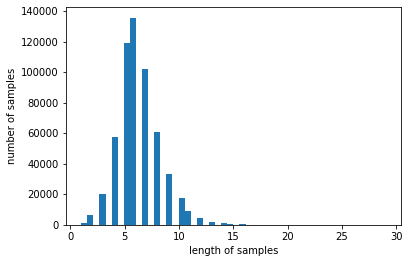

In [ ]:
# 패딩
# 패딩을 위해 전체 데이터에서 가장 길이가 긴 리뷰와 전체 데이터의 길이 분포를 알아본다.

print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
# 대부분의 리뷰가 내용이 잘리지 않도록 전체 샘플 중 길이가 max_len 이하인 샘플의 비율이 몇 %인지 확인하는 함수를 만들어 사용한다.

def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [ ]:
# max_len을 30으로 지정하고 그 분포를 확인해보자.
max_len = 30
below_threshold_len(max_len, X_train)
# 전체 훈련 데이터 중 약 94%의 리뷰가 30이하의 길이를 가지는 것을 확인했다.

전체 샘플 중 길이가 30 이하인 샘플의 비율: 100.0


In [ ]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
from tqdm import tqdm

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

vocab_size = 1000
max_len = 100
embedding_dim = 128
hidden_units = 128
num_classes = 46

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(num_classes, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_train, y_train, batch_size=128, epochs=30, callbacks=[es, mc], validation_data=(X_test, y_test))

Epoch 1/30


InvalidArgumentError: ignored